<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h1 style="text-align: center;">Problem of Cancellation System</h1>

<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<span style="font-size: 18px;">
<p>
A company that sells gifts worldwide, given the increasing trend of order cancellations, wants to update the accounting system, including adding functionality for order returns. 

Tasks
- Determine whether it is possible to create such functionality or not
- Identify possible causes 
</p>
</span>

<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h2 id="Importing-libraries" style="text-align: center;">Importing libraries</h2>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import my_func

from matplotlib_venn import venn2

<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h2 id="Loading-and-Reading-Datasets" style="text-align: center;">Loading and Reading Dataset from the Archives</h2>

In [2]:
archive_path = 'archive.zip'
dataframes_in_zip = my_func.read_csv_files_from_zip(archive_path)
print(f'Amount of datasets: {len(dataframes_in_zip)}')
print(f'Files in zip: {list(dataframes_in_zip.keys())}')

Amount of datasets: 1
Files in zip: ['online_retail.csv']


**Ther is only one file *online_retail.csv***

In [3]:
df_online_retail = dataframes_in_zip['online_retail.csv']
origin_df = df_online_retail.copy()
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<div style="border-bottom: 15px dashed red; width: 100%;"></div>  


<h2 id="Investigating-the-Dataset-Information" style="text-align: center;">Investigating the Dataset Information</h2>

In [4]:
my_func.review_dataframe(df_online_retail)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
--------------------------------------------------------- DATA TYPES -------------------------------------------------

<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h2 id="Data-Transformation" style="text-align: center;">Data Transformation</h2>

In [5]:
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",df_online_retail.shape)
df_online_retail.dropna(subset="CustomerID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",df_online_retail.shape)

Shape of data before removing NaN's CustomerID (541909, 8)
Shape of data after removing NaN's CustomerID (406829, 8)


In [7]:
print("Missing values in each column after cleaning customerID :\n",df_online_retail.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",df_online_retail.duplicated().sum())
df_online_retail = df_online_retail.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df_online_retail.duplicated().sum())

Number of duplicates before cleaning: 5225
Number of duplicates after cleaning: 0


<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h2 id="Refined-Data-Representation-and-Feature-Enhancement" style="text-align: center;">Refined Data Representation and Feature Enhancement</h2>

In [9]:
# Determining order cancellation
df_online_retail = df_online_retail.assign(Cancellation=df_online_retail['InvoiceNo'].str.contains('C', na=False))

# InvoiceDate to date type
df_online_retail = df_online_retail.assign(InvoiceDate=pd.to_datetime(df_online_retail.InvoiceDate))

df_with_cancellation = df_online_retail.query('Cancellation == True')
df_non_cancelled = df_online_retail.query('Cancellation == False')

In [10]:
df_with_cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True


In [11]:
df_non_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


In [12]:
print(f'Main DF shape: {df_online_retail.shape}')
print(f'Non Cancelation DF shape: {df_non_cancelled.shape}')
print(f'Cancellation DF shape: {df_with_cancellation.shape}')

Main DF shape: (401604, 9)
Non Cancelation DF shape: (392732, 9)
Cancellation DF shape: (8872, 9)


<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h2 id="Main Analysis of Cancellations" style="text-align: center;">Main Analysis of Cancellations</h2>


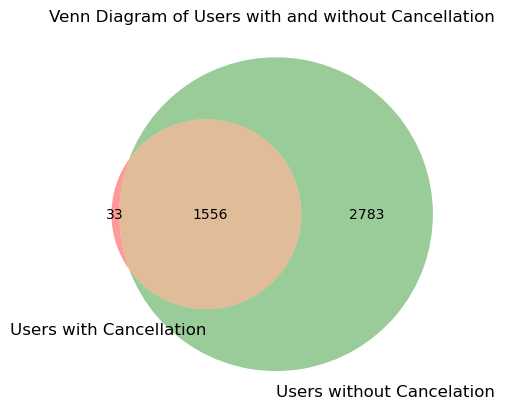

In [13]:
all_customets = df_online_retail['CustomerID'].nunique()
canc_customers = df_with_cancellation['CustomerID'].nunique()
non_canc_customers = df_non_cancelled['CustomerID'].nunique()
A_not_B = all_customets-non_canc_customers
B_not_A = all_customets-canc_customers
A_and_B = all_customets - A_not_B - B_not_A
venn2(subsets = (A_not_B, 
                B_not_A, 
                A_and_B), 
      set_labels = ('Users with Cancellation', 'Users without Cancelation')
     )
plt.title('Venn Diagram of Users with and without Cancellation')
sns.despine()

In [14]:
# Merge the two DataFrames on 'CustomerID', 'Description' and 'StockCode' and filter the rows
merged_df = df_with_cancellation.merge(df_non_cancelled, on=['CustomerID', 'Description', 'StockCode'], suffixes=('_canceled', '_non_canceled'))
number_customers_same_Order_Canc = merged_df['CustomerID'].nunique()

merged_df = merged_df.query('Quantity_canceled < Quantity_non_canceled and InvoiceDate_canceled < InvoiceDate_non_canceled')
number_customers_same_Order_Canc__right_Q_and_Date = merged_df['CustomerID'].nunique()

# Calculate the total money back for each row
merged_df['Total Money Back'] = abs(merged_df['Quantity_canceled'] * merged_df['UnitPrice_canceled'])

# Group by 'CustomerID' and calculate the sum of 'Total Money Back' for each customer
df_money_back = merged_df.groupby('CustomerID')['Total Money Back'].sum().reset_index()

# Sort by 'Total Money Back' in descending order
df_money_back = df_money_back.sort_values('Total Money Back', ascending=False)

# Reset the index
df_money_back.reset_index(drop=True, inplace=True)

In [15]:
print(f'Number of customers: {all_customets}')
print(f'Number of customers who have cancellation: {canc_customers}')
print(f'Number of customers who have only cancellation: {A_not_B}')
print(f'Number of customers who have order: {non_canc_customers}')
print(f'Number of customers who have only order: {B_not_A}')
print(f'Number of customers who have order and cacellation: {A_and_B}')
print(f'Number of customers who have order and cancellation the same items: {number_customers_same_Order_Canc}')
print(f'number of customers who have ordered and canceled the same item, where the number of items in the cancel is less than or equal to the order, and the date of the cancel is later than the date of the order: {number_customers_same_Order_Canc__right_Q_and_Date}')

Number of customers: 4372
Number of customers who have cancellation: 1589
Number of customers who have only cancellation: 33
Number of customers who have order: 4339
Number of customers who have only order: 2783
Number of customers who have order and cacellation: 1556
Number of customers who have order and cancellation the same items: 1475
number of customers who have ordered and canceled the same item, where the number of items in the cancel is less than or equal to the order, and the date of the cancel is later than the date of the order: 684


<div style="border-bottom: 15px dashed red; width: 100%;"></div>  

<h2 id="Conclusions" style="text-align: center;">Conclusions</h2>

<span style="font-size: 18px;">
<p>
During the initial analysis, there were discrepancies in the number of orders, cancellations and differences in their attributes. Therefore, I also analyzed this DataFrame looking for errors and causes     
    
It can be seen that 1593 out of 4372 customers made a cancelation. If the company wants to introduce a method of refunding the order to the customers, the following points should be considered:</p>

<ul>
<li>There are no records of some customers, their IDs;</li>
<li>There are duplicate records;</li>
<li>Only 684 customers have made an order and canceled, the number of items in the cancel is less than or equal to the order, and the date of the cancel is later than the date of the order.</li>
</ul>

<p>I suggest you check the order and cancel accounting system and separate the storage of orders, cancellations, and returns if the company moves to this system.

The buyers who can be refunded (respectively their IDs and total refund amount in pounds sterling) are listed in the following dataframe:
</p>
</span>

In [16]:
df_money_back

,CustomerID,Total Money Back
0,14911.0,58542.19
1,12744.0,24317.80
2,16013.0,21181.29
3,15749.0,19683.40
4,16029.0,18197.31
...,...,...
679,17164.0,0.95
680,17696.0,0.85
681,14329.0,0.85
682,15874.0,0.65
